# 1. S-E-I-R Model

# 2. Markov Chain Model

# 2.1 Assumptions

# 2.2 State

In [109]:
import numpy as np
import scipy as sp
import scipy.sparse
import itertools
import matplotlib.pyplot as plt
import random

In [110]:
# define parameters
S = 0
E = 1
I = 2
R = 3
n = 3

#get possible values of a cell
values = list (range(S,R+1));
print(len(values))
# Generate Sigma
sigma = set (itertools.product(values, repeat=n));

#print the basic information of this example
print ("There are ", n, " people in this case. They are distributed in a ",n," elements array.\n")
print ("There are ",len(sigma)," states.\n")

4
There are  3  people in this case. They are distributed in a  3  elements array.

There are  64  states.



In [114]:
#transfer a matrix to a string
def convert_state_to_string (state):
    str1 = ""   
    for ele in state:
        ele = int(ele)
        str1 += str(ele)  
    return str1  
    
#transfer a string to a matrix
def convert_string_to_state (str):
    return [int(x) for x in str if x.isdigit()]

#generate all the states and save them into a hash map
map = {}
index2str = {}
str2index = {}
i = 0
for state in sigma:
    map[convert_state_to_string(state)] = state
    index2str[i] = convert_state_to_string(state)
    str2index[convert_state_to_string(state)] = i
    i += 1
    

# 2.3 Transition Matrix

In [150]:
P_E2R = 0.10
P_E2I = 1 - P_E2R
P_I2R = 0.10
P_SByE = 0.9
P_SByI = 0.9
Trans_Matrix = np.zeros(shape=(len(sigma),len(sigma)))

def checkE (i, src):
    count = 0
    if i != 0:
        if (src[i-1] == E):
            count += 1
    if i != n-1:
        if (src[i+1] == E):
            count += 1 
    return count

def checkI (i, src):
    count = 0
    if i != 0:
        if (src[i-1] == I):
            count += 1
    if i != n-1:
        if (src[i+1] == I):
            count += 1
    return count


def get_prob(src, dest, i, prob):
    s = src[i]
    d = dest[i]
    ##check edge case
    if s == R and d != R:
        prob = 0
        return prob
    elif s == I and d < I:
        prob = 0
        return prob
    elif s == E and d < E:
        prob = 0
        return prob
    elif s == S and d == R:
        prob = 0
        return prob
    elif s == S and d == I:
        prob = 0
        return prob

    ##check neighbor
    countE = checkE(i,src)
    countI = checkI(i,src)
    if s == R:
        prob = prob * 1
    elif s == I and d == I:
        prob = prob * (1 - P_I2R)
    elif s == I and d == R:
        prob = prob * P_I2R
    elif s == E and d == E:
        prob = prob * (1 - P_E2R - P_E2I)
    elif s == E and d == I:
        prob = prob * P_E2I
    elif s == E and d == R:
        prob = prob * P_E2R
    elif s == S and d == E:
        prob = prob * (1-(1-P_SByE)**countE * (1-P_SByI)**countI)
    elif s == S and d == S:
        prob = prob * (1-P_SByE)**countE * (1-P_SByI)**countI
        
    return prob

#Given conditional probabilities, a transition matrix will be computed.
for sc in range(len(sigma)):
    for dc in range(len(sigma)):
        src = map[index2str[sc]]
        dest = map[index2str[dc]]
        prob = 1
        for i in range(len(src)):
            prob = get_prob(src, dest, i, prob)
        Trans_Matrix[sc,dc] = prob

# 2.4 Markov Chain Simulation

In [158]:
#generate initial state
poll = [0] * n
for i in range(len(poll)):
    poll[i] = i
initial_infected = random.choice(poll)
temp = [0] * n
temp[initial_infected] = 2
initial_state_index = str2index[convert_state_to_string(temp)]
v = np.zeros(shape=(len(sigma),1))
v[initial_state_index] = 1
res = v.transpose()
#res = v*Trans_Matrix
i = 0
while i < 80:
    res = np.matmul(res,Trans_Matrix)
    i += 1

002


# 2.5 Analysis

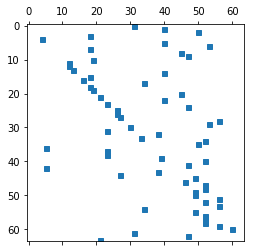

In [159]:
plt.spy (Trans_Matrix, markersize=5, precision=.1)

In [163]:
print("Initial State: ",map[convert_state_to_string(temp)])
print("Steady State: ")
for i in range(len(res[0])):
    if ( res[0,i] > 0.001):
        print(" state: ",map[index2str[i]], " probability: ", res[0,i]);

Initial State:  (0, 0, 2)
Steady State: 
 state:  (3, 3, 3)  probability:  0.9774143721204103
 state:  (0, 0, 3)  probability:  0.010989010989010986
 state:  (0, 3, 3)  probability:  0.010865851807807258
